In [1]:
# magic function para hacer que los graficos de matplotlib se renderizen en el notebook.
#%matplotlib notebook
%matplotlib inline

import datetime as datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

advertiser_id: id de anunciante, cliente de Jampp que paga por el anuncio.<br>
action_id: id de acción.<br>
source_id: ID interna para la fuente (intercambio) desde la cual se originó el click.<br>
created: tiempo en el cual se produjo el click.<br>
latitude,longitude: ubicación de donde se produjo el click.<br>
carrier_id: Id para el operador de telefonía móvil del dispositivo.<br>
trans_id: Id de transacción(valor interno).<br>
os_minor: mínima version del OS.<br>
os_major: máxima versión del OS.<br>
agent_device : Agente para el dispositivo en el que se realizó el clic (modelo).<br>
specs_brand: especificaciones del dispositvo<br>
brand: marca del dispositivo<br>
timeToClick: tiempo de click<br>
touchX: posición en x del click<br>
touchY: posición en y del click<br>
ref_type: id de publicidad de Google ó apple_ifa ???<br>
ref_hash: id del ref_type

In [3]:
clicks = pd.read_csv('../data2/clicks.csv.gzip',compression='gzip', dtype='object')

In [4]:
clicks.head()

,advertiser_id,action_id,source_id,created,country_code,latitude,longitude,wifi_connection,carrier_id,trans_id,os_minor,agent_device,os_major,specs_brand,brand,timeToClick,touchX,touchY,ref_type,ref_hash
0,2,NaN,4,2019-03-06T22:42:12.755Z,6333597102633388268,1.2056887519199482,1.0702342714774236,False,1.0,iGgClCM9exiHF4K31g94XmvHEBSLKIY,6.768137412412545e+18,NaN,3.072849339937028e+18,2733035977666442898,NaN,1.563,0.905,0.078,1891515180541284343,1904083516767779093
1,0,NaN,0,2019-03-08T10:24:30.641Z,6333597102633388268,1.218923733431926,1.0712090638488148,False,4.0,MMHTOJ6qKAOeIH_Eywh1KIcCaxtO9oM,3.025219449024123e+18,NaN,1.77408510258909e+18,392184377613098015,NaN,NaN,NaN,NaN,1891515180541284343,3086509764961796666
2,0,NaN,0,2019-03-08T15:24:16.069Z,6333597102633388268,1.2056887519199482,1.0702342714774236,False,6.0,vIrEIdf9izUaWdAri6Ezk7T3nHFvNQU,5.97565607170903e+18,NaN,3.072849339937028e+18,392184377613098015,NaN,NaN,0.946,0.473,1891515180541284343,6958163894863846647
3,2,NaN,3,2019-03-06T03:08:51.543Z,6333597102633388268,1.2056887519199482,1.0702342714774236,False,45.0,YaKxxEAs2UmZhSpRfiCO9Zpa82B_AKM,6.768137412412545e+18,NaN,3.072849339937028e+18,2733035977666442898,NaN,19.013,0.035,0.431,1891515180541284343,4368617728156436525
4,2,NaN,3,2019-03-06T03:32:55.570Z,6333597102633388268,1.2056887519199482,1.0702342714774236,False,45.0,X5XTOcYQovkl6yadYdAD7xioVGU9jiY,6.768137412412545e+18,NaN,3.072849339937028e+18,2733035977666442898,NaN,28.11,0.054,0.423,1891515180541284343,4368617728156436525


In [5]:
clicks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26351 entries, 0 to 26350
Data columns (total 20 columns):
advertiser_id      26351 non-null object
action_id          0 non-null object
source_id          26351 non-null object
created            26351 non-null object
country_code       26351 non-null object
latitude           26351 non-null object
longitude          26351 non-null object
wifi_connection    26351 non-null object
carrier_id         26340 non-null object
trans_id           26351 non-null object
os_minor           26339 non-null object
agent_device       3243 non-null object
os_major           26339 non-null object
specs_brand        26351 non-null object
brand              6235 non-null object
timeToClick        22977 non-null object
touchX             23011 non-null object
touchY             23011 non-null object
ref_type           26351 non-null object
ref_hash           26351 non-null object
dtypes: object(20)
memory usage: 4.0+ MB


In [6]:
print("# Anunciantes: "+str(clicks['advertiser_id'].describe()[0]))

# Anunciantes: 26351


## Alguna info
#### * Todas las conexiones son por wifi
#### * agent_device tiene muchos valores nulos
#### * brand tiene muchos valores nulos

In [9]:
print("touchX nulas: "+ str(clicks[clicks['touchX'].isnull()].count()))
print("touchX NO nulas: "+ str(clicks[clicks['touchX'].notnull()].count()))

touchX nulas: advertiser_id      3340
action_id             0
source_id          3340
created            3340
country_code       3340
latitude           3340
longitude          3340
wifi_connection    3340
carrier_id         3329
trans_id           3340
os_minor           3330
agent_device        601
os_major           3330
specs_brand        3340
brand               849
timeToClick          16
touchX                0
touchY                0
ref_type           3340
ref_hash           3340
dtype: int64
touchX NO nulas: advertiser_id      23011
action_id              0
source_id          23011
created            23011
country_code       23011
latitude           23011
longitude          23011
wifi_connection    23011
carrier_id         23011
trans_id           23011
os_minor           23009
agent_device        2642
os_major           23009
specs_brand        23011
brand               5386
timeToClick        22961
touchX             23011
touchY             23011
ref_type           23011
r

In [31]:
# ???
clicks['touchX'].count()

23011

In [24]:
#Valores nulos en X e Y
clicks[clicks['touchX'].isnull()]['ref_hash'].count()

3340

In [25]:
clicks[clicks['touchY'].isnull()]['ref_hash'].count()

3340

In [29]:
#Valores no nulos en X e Y
clicks[clicks['touchX'].notnull()]['ref_hash'].count()

23011

In [28]:
clicks[clicks['touchY'].notnull()]['ref_hash'].count()

23011

In [33]:
#Remuevlo los valores nulos de X e Y
clicks_ok = clicks[clicks['touchX'].notnull()][['touchX','touchY']]
clicks_ok.head()

,touchX,touchY
0,0.905,0.078
2,0.946,0.473
3,0.035,0.431
4,0.054,0.423
5,0.606,0.459


In [42]:
#Transformo a numerico
clicks_ok['touchX'] = clicks_ok['touchX'].apply(pd.to_numeric)
clicks_ok['touchY'] = clicks_ok['touchY'].apply(pd.to_numeric)
clicks_ok.head()
clicks_ok.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23011 entries, 0 to 26350
Data columns (total 2 columns):
touchX    23011 non-null float64
touchY    23011 non-null float64
dtypes: float64(2)
memory usage: 539.3 KB


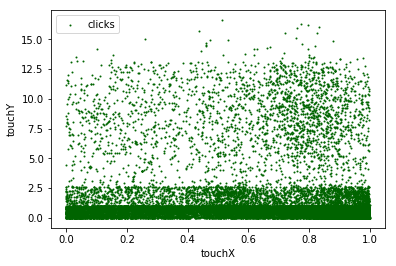

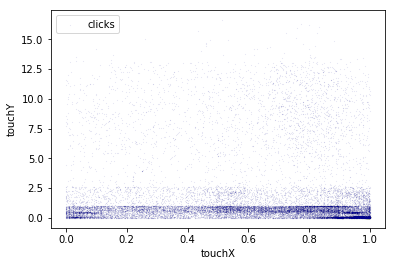

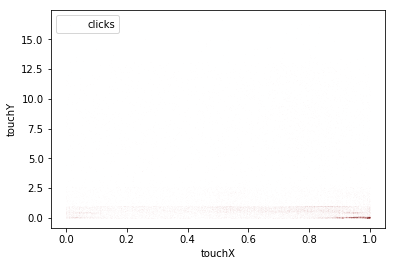

In [44]:
#Miro la distribución de los clicks
clicks_ok.plot.scatter(x='touchX', y='touchY', color='DarkGreen', label='clicks',s = 1)
clicks_ok.plot.scatter(x='touchX', y='touchY', color='DarkBlue', label='clicks',s = 0.001)
clicks_ok.plot.scatter(x='touchX', y='touchY', color='DarkRed', label='clicks',s = 0.00001)
#Parece ser que la gran mayoría de los usuarios clickean en la parte inferior de la publicidad.
#En la parte inferior derecha existe la mayor cantidad de clicks
#Se pueden diferenciar(?) 3 zonas de click en base a una aparente densidad, a saber,
#los click comprendidos entre 15~2.5 ; 2.5~1 ; 1~0

In [46]:
#Vemos como fueron esos clicks en tiempo
#Sabemos que el timeToClick es el tiempo(segundos) que demora un usuario en hacer 1 click desde que aparece
#la impresion(publicidad)
clicks.head()

,advertiser_id,action_id,source_id,created,country_code,latitude,longitude,wifi_connection,carrier_id,trans_id,os_minor,agent_device,os_major,specs_brand,brand,timeToClick,touchX,touchY,ref_type,ref_hash
0,2,NaN,4,2019-03-06T22:42:12.755Z,6333597102633388268,1.2056887519199482,1.0702342714774236,False,1.0,iGgClCM9exiHF4K31g94XmvHEBSLKIY,6.768137412412545e+18,NaN,3.072849339937028e+18,2733035977666442898,NaN,1.563,0.905,0.078,1891515180541284343,1904083516767779093
1,0,NaN,0,2019-03-08T10:24:30.641Z,6333597102633388268,1.218923733431926,1.0712090638488148,False,4.0,MMHTOJ6qKAOeIH_Eywh1KIcCaxtO9oM,3.025219449024123e+18,NaN,1.77408510258909e+18,392184377613098015,NaN,NaN,NaN,NaN,1891515180541284343,3086509764961796666
2,0,NaN,0,2019-03-08T15:24:16.069Z,6333597102633388268,1.2056887519199482,1.0702342714774236,False,6.0,vIrEIdf9izUaWdAri6Ezk7T3nHFvNQU,5.97565607170903e+18,NaN,3.072849339937028e+18,392184377613098015,NaN,NaN,0.946,0.473,1891515180541284343,6958163894863846647
3,2,NaN,3,2019-03-06T03:08:51.543Z,6333597102633388268,1.2056887519199482,1.0702342714774236,False,45.0,YaKxxEAs2UmZhSpRfiCO9Zpa82B_AKM,6.768137412412545e+18,NaN,3.072849339937028e+18,2733035977666442898,NaN,19.013,0.035,0.431,1891515180541284343,4368617728156436525
4,2,NaN,3,2019-03-06T03:32:55.570Z,6333597102633388268,1.2056887519199482,1.0702342714774236,False,45.0,X5XTOcYQovkl6yadYdAD7xioVGU9jiY,6.768137412412545e+18,NaN,3.072849339937028e+18,2733035977666442898,NaN,28.11,0.054,0.423,1891515180541284343,4368617728156436525


In [70]:
#Saco los nulos
clicks_ok['timeToClick'] = clicks[clicks['timeToClick'].notnull()]['timeToClick']
#clicks_ok['timeToClick'] = clicks_ok.loc[(~clicks_ok['timeToClick'].isnull())]

In [93]:
c_ok_sort.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22961 entries, 18789 to 22355
Data columns (total 3 columns):
touchX         22961 non-null float64
touchY         22961 non-null float64
timeToClick    22961 non-null float64
dtypes: float64(3)
memory usage: 717.5 KB


In [92]:
c_ok_sort['timeToClick'] = c_ok_sort['timeToClick'].apply(pd.to_numeric)

In [71]:
c_ok_sort = clicks_ok.sort_values(by='timeToClick',ascending=False)

In [76]:
c_ok_sort = c_ok_sort[c_ok_sort['timeToClick'] > 0]

In [94]:
c_ok_sort[(c_ok_sort['touchX'] > 0.8) & (c_ok_sort['touchY'] < 1)].mean()

touchX           0.919521
touchY           0.347811
timeToClick    129.317842
dtype: float64

In [ ]:
#La media de tiempo de 1 publicación es ~129(~ 2 minutos) en la zona de mayor densidad de clicks

In [95]:
#Cuál es el tiempo de la publicación entre los click de menor densidad?
c_ok_sort[(c_ok_sort['touchY'] > 1) & (c_ok_sort['touchY'] < 2.5)].mean()

touchX           0.599919
touchY           1.235983
timeToClick    240.147028
dtype: float64

In [145]:
#Densidad en Y
d5 = c_ok_sort[(c_ok_sort['touchY'] > 10) & (c_ok_sort['touchY'] < 15)]['timeToClick'].mean()
d5

684.3137341269842

In [146]:
d4 = c_ok_sort[(c_ok_sort['touchY'] > 7.5) & (c_ok_sort['touchY'] < 10)]['timeToClick'].mean()
d4

524.9569775429327

In [147]:
d3 = c_ok_sort[(c_ok_sort['touchY'] > 5) & (c_ok_sort['touchY'] < 7.5)]['timeToClick'].mean()
d3

640.2895349593496

In [148]:
d2 = c_ok_sort[(c_ok_sort['touchY'] > 2.5) & (c_ok_sort['touchY'] < 5)]['timeToClick'].mean()
d2

477.46055993150685

In [149]:
d1 = c_ok_sort[(c_ok_sort['touchY'] > 1) & (c_ok_sort['touchY'] < 2.5)]['timeToClick'].mean()
d1

186.05920935960594

In [150]:
d0 = c_ok_sort[(c_ok_sort['touchY'] > 0) & (c_ok_sort['touchY'] < 1)]['timeToClick'].mean()
d0

181.9519464285714

In [184]:
lista = [d0,d1,d2,d3,d4,d5]
#lista2 = ["0.0-1.0","1.0-2.5","2.5-5.0","5.0-7.5","7.5-10.0","10.0-15.0"]
lista2 =list(range(0, 6))
lista2

[0, 1, 2, 3, 4, 5]

In [185]:
data={'ubicacion':lista2,'tiempo_clicks':lista}
df = pd.DataFrame(data=data)
df

,tiempo_clicks,ubicacion
0,181.951946,0
1,186.059209,1
2,477.460560,2
3,640.289535,3
4,524.956978,4
5,684.313734,5


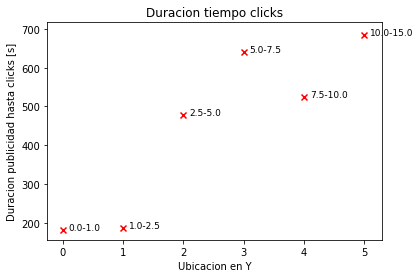

In [198]:
xc = df['ubicacion']
yc = df['tiempo_clicks']

types = ["0.0~1.0","1.0~2.5","2.5~5.0","5.0~7.5","7.5~10.0","10.0~15.0"]
x_coords = xc = df['ubicacion']
y_coords = yc = df['tiempo_clicks']

for i,type in enumerate(types):
    x = x_coords[i]
    y = y_coords[i]
    plt.scatter(x, y, marker='x', color='red')
    plt.text(x+0.1, y+0.1, type, fontsize=9)
plt.title("Duracion tiempo clicks")
plt.xlabel("Ubicacion en Y")
plt.ylabel("Duracion publicidad hasta clicks [s]")

plt.show()

### Podemos ver que los eventos(clicks) que están en la parte superior de la pantalla suceden después de un tiempo más largo.
### Mientras que en la parte inferior de la pantalla suceden suceden más rápido.